#Data Visualization

##What is Data Visualization

Data visualization is the representation of information in the form of a chart, diagram, picture, etc. Visualization is a form of data exploration. We want to graphically represent the data is a way that helps us better understand what's going on.

##First let's import our libraries.
* Numpy is a highly optimized library for handling multi-dimensional arrays
* Pandas is a library with data manipulation and analysis tools
* Matplotlib is a plotting library
* Scikit-learn or sklearn is a free machine learning library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

We won't be using this library right now but some libraries like Seaborn have datasets that you can load with a function. Let's take a look at what seaborn has.

In [0]:
import seaborn as sns
sns.get_dataset_names()
#sns.load_dataset('iris')

#Basics of Plotting
Pandas comes with some basic plotting functions built into it's dataframe types.

##Line Graphs

In [0]:
x_1 = np.arange(100)
x_2 = x_1 * 4.0 + 100.0
x_3 = (x_1 ** 2)/16

data = pd.DataFrame({'X1':x_1, 'X2':x_2, 'X3':x_3})
data.plot.line()

##Log Scale

In [0]:
x_1 = np.arange(20)
x_3 = (2 ** x_1)/16

data = pd.DataFrame({'X3':x_3})
data.plot.line(loglog=True).legend(bbox_to_anchor=(0.2, 1))

##XKCD
Just for fun, matplotlib allows us to make these graphs in XKCD style. 

In [0]:
with plt.xkcd():
    data.plot.line()

##Bar Graph

In [0]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

#Iris Dataset

In [0]:
iris_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')
iris_data.head(10)

What does this data tell us just by looking at it?

We have:

* 4 columns of continuous quantiative data (Sepal Length, Sepal Width, Petal Length, Petal Width)
* 1 column of qualitative data (Species)

We can use the ```unique()``` command on the species column to get an idea of how many different types of species there are.

In [0]:
iris_data['species'].unique()

Let's get some basic information about the data using the describe command.

In [0]:
setosa=iris_data[iris_data['species']=='setosa']
versicolor =iris_data[iris_data['species']=='versicolor']
virginica =iris_data[iris_data['species']=='virginica']

print('Dataset Summary')
print(iris_data.describe(),'\n')
print('Setosa Summary')
print(setosa.describe(),'\n')
print('Versicolor Summary')
print(versicolor.describe(),'\n')
print('Virginica Summary')
print(virginica.describe())

##Box and Whisker Plot
We can visualize all this information with a box and whisker plot.

Note here we can use the matplotlib library to help us better visualize the pandas plots.

In [0]:
fig,ax=plt.subplots(1,3,figsize=(20, 10))
setosa.boxplot(ax=ax[0]).set_title('Setosa')
versicolor.boxplot(ax=ax[1]).set_title('Versicolor')
virginica.boxplot(ax=ax[2]).set_title('Virginica')

IQR (Inner Quartile Range)

If a point is 1.5 * IQR (Interquartile Range) from either Q1 for low numbers or Q3 for large numbers, then it is shown as a dot or an outlier.

<center><img src=https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2012/03/iqr.jpg></center>

##Histograms
A histogram shows amount of data that falls between points in the range. This is good for showing the distribution of the data. 

In [0]:
fig,ax=plt.subplots(1,4,figsize=(25, 5))
iris_data['sepal_length'].plot.hist(ax=ax[0], title='Sepal Length')
iris_data['sepal_width'].plot.hist(ax=ax[1], title='Sepal Width')
iris_data['petal_length'].plot.hist(ax=ax[2], title='Petal Length')
iris_data['petal_width'].plot.hist(ax=ax[3], title='Petal Width')

##Scatter Plot

In [0]:
iris_data.plot.scatter(x='sepal_length',y='sepal_width')

There's a very obvious issue with this type of graph. We have 4 features that can be plotted on a scatter plot but only 2 can be shown on this type of scatter plot. What can we do?

In [0]:
iris_data.plot.scatter(x='sepal_length', y='sepal_width',c='petal_length', colormap='viridis')

We could create a 3D plot of the data. To do that we'll need another library. If you get time you can explore it some on your own. Just enter the code below to import the functions you'll need and check out the matplotlib toolkit at https://matplotlib.org/mpl_toolkits/index.html

In [0]:
# from mpl_toolkits.mplot3d import Axes3D

##More Scatter Plots

There's still a problem if we were to visualize the data on a 3D plot. We have 4 features so we'd have to exclude one. Instead we could get a view of every feature against each other. 

In [0]:
features = iris_data.columns[:-1]
plt.figure()
fig,ax=plt.subplots(4,4,figsize=(17, 17))
for label_count1, label1 in enumerate(features):
  for label_count2, label2 in enumerate(features):
    iris_data.plot.scatter(x=label1, y=label2, ax=ax[label_count1,label_count2])

What do you notice about the graphs? 

* Some of them look like they're just lines. Those are features plotted against themselves (i.e. Petal Width and Petal Width)

* Some of the plot look similar. The graphs on the top right are just flipped versions of the graphs on the bottom left

We can get more information from these graphs if we separate them into their types.

In [0]:
features = iris_data.columns[:-1]
plt.figure()
fig,ax=plt.subplots(4,4,figsize=(17, 17))
for label_count1, label1 in enumerate(features):
  for label_count2, label2 in enumerate(features):
    setosa.plot.scatter(x=label1, y=label2, label='setosa', ax=ax[label_count1,label_count2], color='red')
    versicolor.plot.scatter(x=label1, y=label2, label='versicolor', ax=ax[label_count1,label_count2], color='green')
    virginica.plot.scatter(x=label1, y=label2, label='virginica', ax=ax[label_count1,label_count2], color='blue')
    ax[label_count1,label_count2].legend()

We see a pretty clear separation between Setosa and the other species but the other 2 seem to be closely related.

##Heat Maps
Pandas has a built in function (.corr()) that allows us to get the correlation matrix of our data pretty easily but viewing that information in matrix isn't always easy. We can use heat maps to show correlation through colors (white=+1, black=-1, red=0)

In [0]:
iris_data.corr()

In [0]:
plt.matshow(iris_data.corr(), cmap='hot')

We don't have to just measure correlation. We can think of a row of data as a vector. For example row 1 and row 2 of the iris_data is [5.1,	3.5,	1.4,	0.2, 'setosa'] and [4.9,	3.0,	1.4,	0.2,	setosa]. If we take just the first 4 features (or columns), we can think of these rows as the vectors [5.1,	3.5,	1.4,	0.2] and [4.9,	3.0,	1.4,	0.2]. We can measure the angle between these 2 vectors to gives a measure of similarity. In this case we are taking the Cosine Similarity.

<center><img src='https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png'></center>

Taking the cosine similarity will give us a matrix of the pairwise cosine similarity between each row. We can visualizes this using a heat map.



In [0]:
from sklearn.metrics.pairwise import cosine_similarity as CS

plt.figure(figsize=(15,15))
plt.imshow(CS(iris_data.iloc[:,:-1]), cmap='hot')

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(CS(setosa.iloc[:,:-1], virginica.iloc[:,:-1]), cmap='hot')

Heat maps can be used for a lot more than this. They are very useful in displaying 2 dimensional matrices with values between -1 and 1.

#Clustering

##K-Means Clutering

The K-means algorithm works by randomly placing an assigned number of cluster centers in the search space of your data. Once the clusters centers have been initialized, each data point is assigned to the closest cluster center (Shown as "Update Cluster Assignments" below). Then the cluster centers are moved to the centroid of the points that are assigned to the cluster center (Shown as "Update Cluster Centers" below). You repeat these last 2 steps until you have a minimal number of changes in cluster reassignments or the max number of iterations is reached.

The goal of the alogirthm is to reduce the within cluster sum of squares or interia: 

<center> $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$ </center>

Where $C$ are the clusters, $n$ is the number of samples, $x_i$ is the data points assigned to cluster $i$, and $\mu_j$ is the cluster center.

Sklearn accomplishes this by running the alogirthm multiple times with different random starting points for your cluster centers and picking the best one.


<center>!<img src='https://i.imgur.com/k4XcapI.gif'></center>

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_data.iloc[:,:4])


features = iris_data.columns[:-1]
plt.figure()
fig,ax=plt.subplots(4,4,figsize=(17, 17))
for label_count1, label1 in enumerate(features):
  for label_count2, label2 in enumerate(features):
    iris_data.plot.scatter(x=label1, y=label2, c=kmeans.labels_, ax=ax[label_count1,label_count2], cmap='viridis')

In [0]:
sum_ = 0
species = iris_data['species'].unique()
for row_num, row in iris_data.iterrows():
  if species[kmeans.labels_[row_num]] == row.iloc[-1]:
    sum_ += 1
    
print(str((sum_ / len(iris_data)) * 100) + '%')

##Cluster Estimation

What if we don't know how many clusters we need?

There's a couple different methods of determining the number of clusters needed for the K-means algorithm:

* Gap statistic
* Elbow method
* Silhouette method

Additionally, you can look into the Mean Shift algorithm. 

Or we could try to look at the data and develop a type of hierarchical structure...

###Hierarchical Clustering
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. If we were successively merging you could start the algorithm by think of each point as a cluster. The first point is randomly selected and merged based on the linkage you have selected. In the case of centroid, the two points would be merged based on their centroid, then they become a new cluster with a new centroid that can be linked to another cluster. This continues until all points are linked.

In [0]:
from sklearn.cluster import AgglomerativeClustering



Linkage:

* Single - Links points with the shortest within cluster distance
* Complete - Links points with the greatest within cluster distance
* Average - Links average within cluster distance
* Centroid - Links to the minimum cluster centroid distance
* Median - Links to the minimum cluster median
* Ward - Uses the Ward variance minimization algorithm

<center><img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png' height=500 width=500> </center>

In [0]:
cluster = AgglomerativeClustering(linkage='average')
cluster.fit(iris_data.iloc[:,:4])
cluster.labels_

features = iris_data.columns[:-1]
plt.figure()
fig,ax=plt.subplots(4,4,figsize=(17, 17))
for label_count1, label1 in enumerate(features):
  for label_count2, label2 in enumerate(features):
    iris_data.plot.scatter(x=label1, y=label2, c=cluster.labels_, ax=ax[label_count1,label_count2], cmap='viridis')

Notice that this type of clustering only recognized 2 clusters. We know that there are 3 distinct types but that's not always obvious when we look at data without labels. 

###Dendrogram
We can view the hierarchy created by our algorithm using a dendrogram. This shows which clusters were linked to each other. The higher up the dendrogram we go, the greater the value of the linkage that we've selected.

New library:

* Scipy is a Python-based ecosystem of open-source software for mathematics, science, and engineering

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(25,10))
link = linkage(iris_data.iloc[:,:4], 'average')
dendrogram(link)
plt.show()

##PCA

Is there a better way to visualizehigh dimensional data? The answer is yes... kind of... PCA or Principal Component Analysis allows us to view any dimensional data in 1, 2 or 3 dimensions. In 2 dimensions it can be thought of as rotating an imaginary axis about the origin until we minimize our Sum of Squared Distances. If we wanted to reduce this data from 2 dimensions to 1, we would project all our points onto this axis. Same idea from 3 dimensions to 2 or 4 to 3 or 128 to 2. 

<center><img src='https://thumbs.gfycat.com/AnchoredDisloyalCanine-size_restricted.gif' height=400 width=500></center>

Note: Information is lost during this processes but PCA to find the optimal axes to describe your data without lossing too much information. 

In [0]:
iris_data.head()

In [0]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(iris_data.iloc[:,:4])
new_iris = pca.transform(iris_data.iloc[:,:4])
new_iris = pd.DataFrame({'Principal Component 1':new_iris[:,0],'Principal Component 2':new_iris[:,1]})

fig,ax=plt.subplots(1,1,figsize=(10, 10))
new_iris.loc[iris_data['species'] == 'setosa'].plot.scatter(x='Principal Component 1', y='Principal Component 2', label='setosa', color='red', ax=ax)
new_iris.loc[iris_data['species'] == 'versicolor'].plot.scatter(x='Principal Component 1', y='Principal Component 2', label='versicolor', color='green', ax=ax)
new_iris.loc[iris_data['species'] == 'virginica'].plot.scatter(x='Principal Component 1', y='Principal Component 2', label='virginica', color='blue', ax=ax)
ax.legend()

##t-SNE
Like PCA, t-SNE decomposes high dimensional data so that we can visualize it.

You can read the paper [here](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).

In [0]:
from sklearn.manifold import TSNE

new_iris = TSNE(n_components=2, early_exaggeration=2.0).fit_transform(iris_data.iloc[:,:-1])
new_iris.shape

new_iris = pd.DataFrame({'Feature 1':new_iris[:,0],'Feature 2':new_iris[:,1]})

fig,ax=plt.subplots(1,1,figsize=(10, 10))
new_iris.loc[iris_data['species'] == 'setosa'].plot.scatter(x='Feature 1', y='Feature 2', label='setosa', color='red', ax=ax)
new_iris.loc[iris_data['species'] == 'versicolor'].plot.scatter(x='Feature 1', y='Feature 2', label='versicolor', color='green', ax=ax)
new_iris.loc[iris_data['species'] == 'virginica'].plot.scatter(x='Feature 1', y='Feature 2', label='virginica', color='blue', ax=ax)
ax.legend()

#IBM Watson Win Loss Data

In [0]:
win_loss_data = pd.read_csv('https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv')
win_loss_data.head()

In [0]:
from sklearn import preprocessing

processed_frame = win_loss_data.iloc[:,1:].replace('Unknown',0)
processed_frame.replace('Known',1,True)
processed_frame.replace('None',-1,True)
processed_frame.replace('Won',1,True)
processed_frame.replace('Loss',0,True)

one_hot_ss = pd.get_dummies(win_loss_data['Supplies Subgroup'],prefix='Supplies Subgroup')
one_hot_sg = pd.get_dummies(win_loss_data['Supplies Group'],prefix='Supplies Group')
one_hot_rg = pd.get_dummies(win_loss_data['Region'],prefix='Region')
one_hot_rtm = pd.get_dummies(win_loss_data['Route To Market'],prefix='Route To Market')

processed_frame = pd.concat([one_hot_ss,processed_frame.iloc[:,4:]], axis=1)
processed_frame = pd.concat([one_hot_sg,processed_frame], axis=1)
processed_frame = pd.concat([one_hot_rg,processed_frame], axis=1)
processed_frame = pd.concat([one_hot_rtm,processed_frame], axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
processed_frame = pd.DataFrame(min_max_scaler.fit_transform(processed_frame.values), columns=processed_frame.columns)
processed_frame.head()


In [0]:
processed_frame.describe()

In [0]:
from scipy.stats import pearsonr

num_drops = 3
drop_processed_frame = processed_frame

for drop_count in range(num_drops):
  _min = 1
  for feature in drop_processed_frame.drop(columns='Opportunity Result').columns:
    corr = np.abs(pearsonr(processed_frame['Opportunity Result'],drop_processed_frame[feature])[0]) 
    if corr < _min:
      _min = corr
      drop_feature = i
  drop_processed_frame.drop(columns=drop_feature)
  print('Dropping ', drop_feature)
    
drop_processed_frame.head()

In [0]:
plt.figure(figsize=(15,15))
plt.matshow(processed_frame.corr(), cmap='hot', fignum=1)

In [0]:
processed_frame.columns[13]

'Supplies Group_Car Electronics'

In [0]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(processed_frame.drop(columns='Opportunity Result'))
decomposed_data = pca.transform(processed_frame.drop(columns='Opportunity Result'))
decomposed_data = pd.DataFrame(decomposed_data, columns=['PCA 1', 'PCA 2'])

features = decomposed_data

decomposed_winners = decomposed_data.loc[processed_frame['Opportunity Result'] == 1]
decomposed_losers = decomposed_data.loc[processed_frame['Opportunity Result'] == 0]

fig,ax=plt.subplots(1,1,figsize=(10, 10))
decomposed_losers.plot.scatter(x='PCA 1', y='PCA 2', ax=ax, color='blue')
decomposed_winners.plot.scatter(x='PCA 1', y='PCA 2', ax=ax, color='red')

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(25,10))
link = linkage(decomposed_data, 'average')
dendrogram(link)
plt.show()

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(processed_frame.drop(columns='Opportunity Result'))

In [0]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=2).fit(processed_frame.drop(columns='Opportunity Result'))

In [0]:
from sklearn.manifold import TSNE

decomposed_data = TSNE(n_components=2).fit_transform(processed_frame.drop(columns='Opportunity Result'))

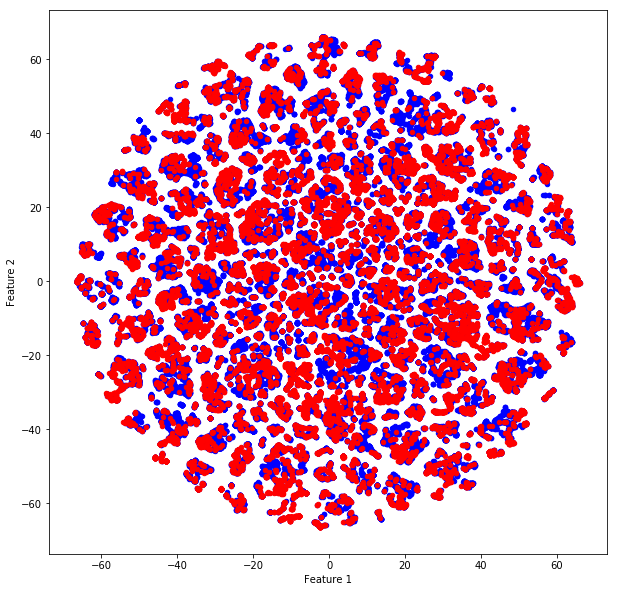

In [0]:
decomposed_data = pd.DataFrame(decomposed_data, columns=['Feature 1', 'Feature 2'])

decomposed_winners = decomposed_data.loc[processed_frame['Opportunity Result'] == 1]
decomposed_losers = decomposed_data.loc[processed_frame['Opportunity Result'] == 0]

fig,ax=plt.subplots(1,1,figsize=(10, 10))
decomposed_losers.plot.scatter(x='Feature 1', y='Feature 2', ax=ax, color='blue')
decomposed_winners.plot.scatter(x='Feature 1', y='Feature 2', ax=ax, color='red')